In [90]:
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [91]:
train=pd.read_csv('E:/Data Science/data/Spaceship_Titanic/train.csv')
test=pd.read_csv('E:/Data Science/data/Spaceship_Titanic/test.csv')

- ## Need to add steps note havent done that yet... will do later 

# DATA EXPLORATION

- passenger id is useful the groupnumber and passenger number can identify the missing HomePlanet and Destination using the data just above and below 

In [93]:
#
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [94]:
train_len=len(train)
print(len(train))
train.isnull().sum()

8693


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [95]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Percentile meaning.....
(Age).........................Same meaning for others
75% people are 38 or younger
50% people are 27 or younger

In [96]:
# cant use function for visualisn here as except Age all num hav very diff vals
# cay=tegorical also notworking

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Age wrt Destination & Homeplanet

<AxesSubplot:xlabel='Age', ylabel='Count'>

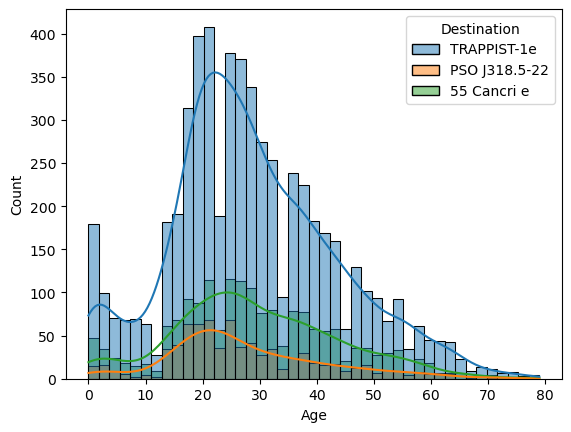

In [98]:
sns.histplot(data=train,x=train['Age'],hue=train['Destination'],kde=True)

- Most have age 21-25    (Can fill Age wrt Destination)

<AxesSubplot:xlabel='Age', ylabel='Count'>

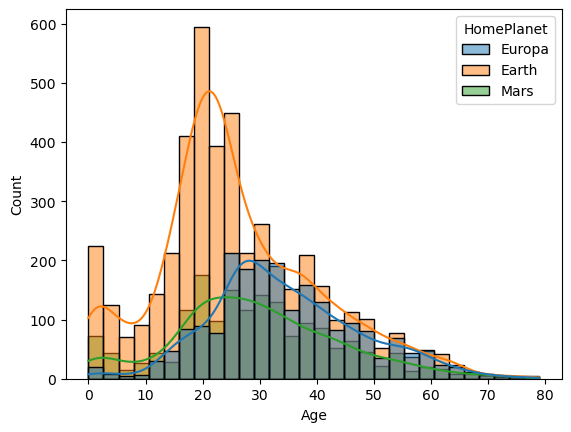

In [99]:
sns.histplot(data=train,x=train['Age'],hue=train['HomePlanet'],bins=30,kde=True)

- From Earth most are of age-22
- From mars -25
- From Europa 27

########################################################################################################

#### -Transported is numerical ie it is in Boolean so need to convert it to Categorical ?? (No need actualy works fine normally)

def impute_val(col):
    if col==True:
        return 'true'
    elif col== False:
        return 'false'

train['Transported']= train['Transported'].apply(impute_val)

train['Transported'].head()

- function for categorical ddnt work

########################################################################################################

### CRYOSLEEP wrt Homeplanet, Destination

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

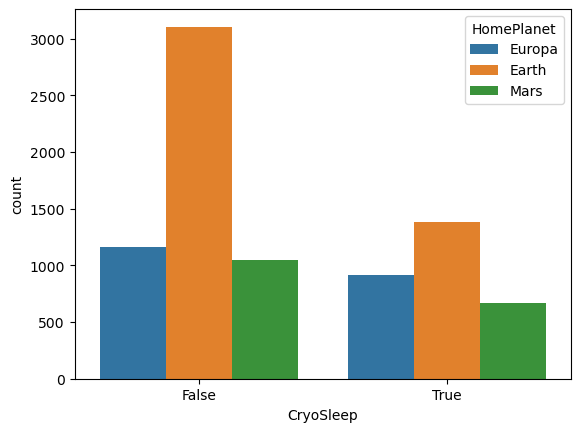

In [100]:
sns.countplot(data=train,x=train['CryoSleep'],hue=train['HomePlanet'])

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

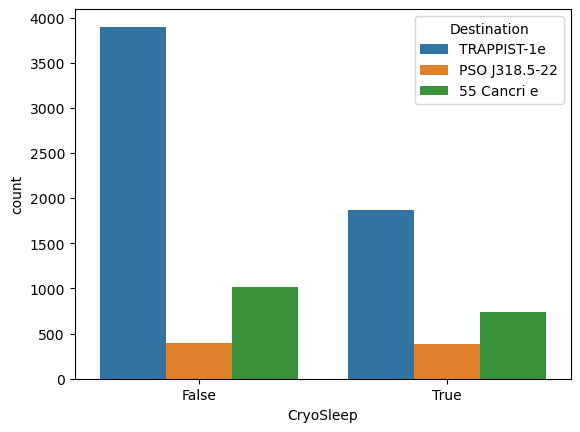

In [101]:
sns.countplot(data=train,x=train['CryoSleep'],hue=train['Destination'])

Cryosleep has no pattern wrt either HomePlanet or EndDestination (so use Mode for impute cryosleep)

### VIP wrt Homeplanet and Destination

<AxesSubplot:xlabel='VIP', ylabel='count'>

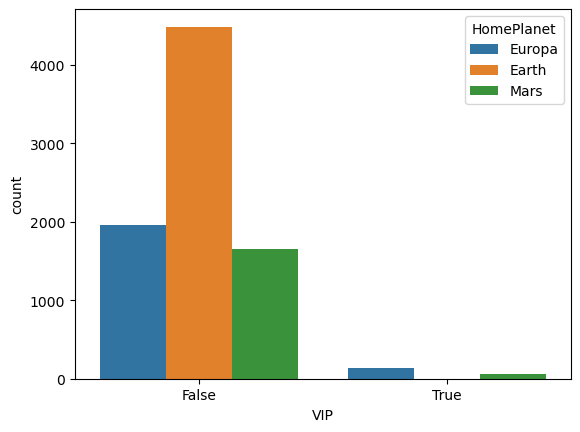

In [102]:
sns.countplot(data=train,x=train['VIP'],hue='HomePlanet')

- Earth has no VIPs , So if VIP is missing, HomePlanet is Earth VIP=FALSE (actually most are non VIP so VIp= False only)
- If VIP is True HomePlanet missing most Vip from Europa so fill Europa

<AxesSubplot:xlabel='VIP', ylabel='count'>

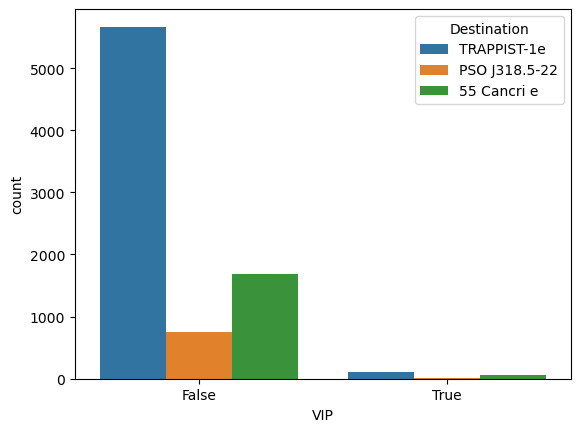

In [103]:
sns.countplot(data=train,x=train['VIP'],hue='Destination')

- No VIP is going to PSO Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

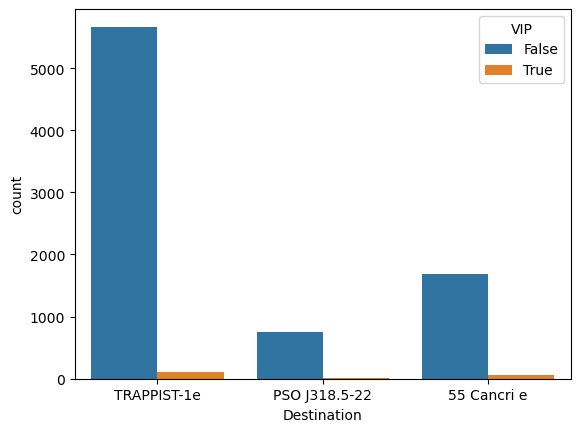

In [104]:
sns.countplot(data=train,x='Destination',hue='VIP')           #hue=df['VIP'] no relation

Most passengers going to Trappist (No pattern for VIP either

In [105]:
#sns.countplot(data=train,x=train['Cabin'])

- Cabin has lot of unique values

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [107]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [108]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


- Merging both train and test for missing values operation

In [109]:
train_len=len(train)
                                    # combine train and test to do all data processing in them together
df=pd.concat([train,test],axis=0)  # axis=0 => row wise concatenation 1=> column wise ie more columns added
df=df.reset_index(drop=True)                 # df is  combination of both train and test
df.head()     

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [110]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


- transport is missing in the end b/c test doesn't have Transported column

In [111]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

### Histplot for all numerical values

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

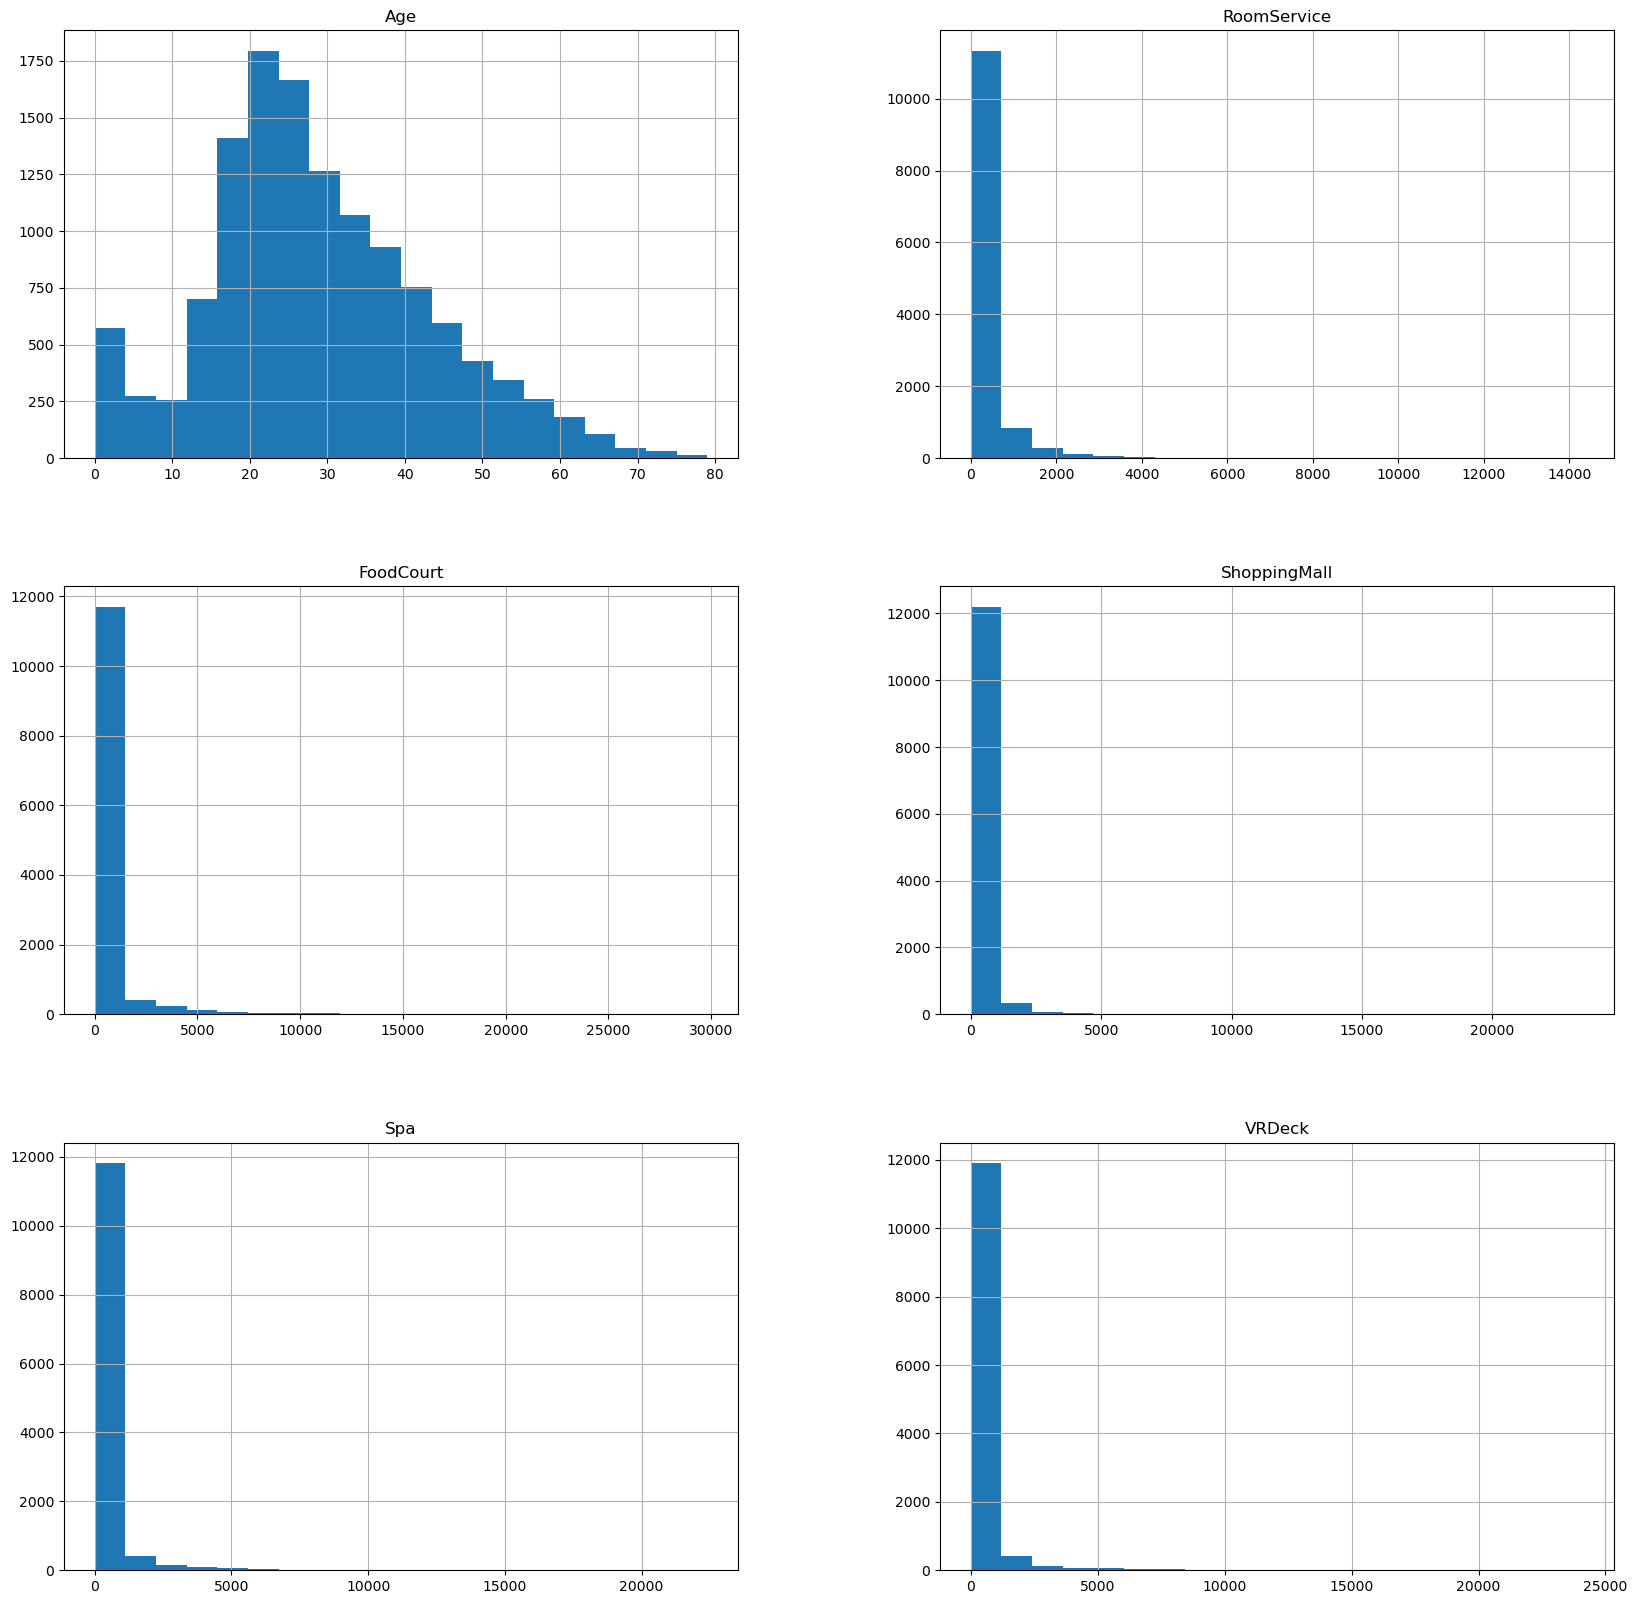

In [112]:
df.hist(figsize=(20,20),bins=20)

- Highly Left skewed data so must use log transformation to get bell curve (~equal distribution)

#### any transformation only after filling missing values

<AxesSubplot:xlabel='Age', ylabel='Density'>

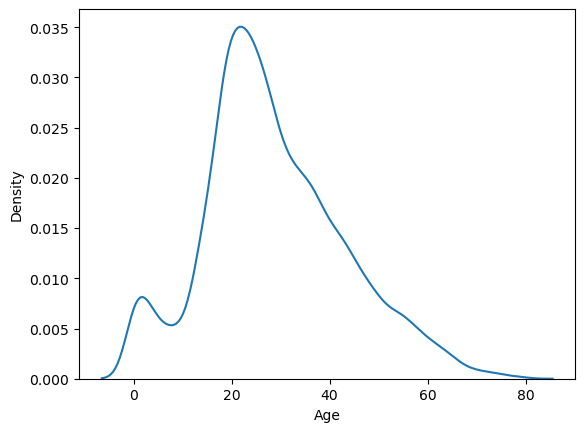

In [113]:
sns.kdeplot(df['Age'])     #sns.kdeplot(np.sqrt(df['Age']+1))

In [114]:
df['Age'].median()

27.0

In [115]:
df.isnull().sum()
# only Pid ,Transported we have full values

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

# Testing sqrt transform

<AxesSubplot:xlabel='Spa', ylabel='Count'>

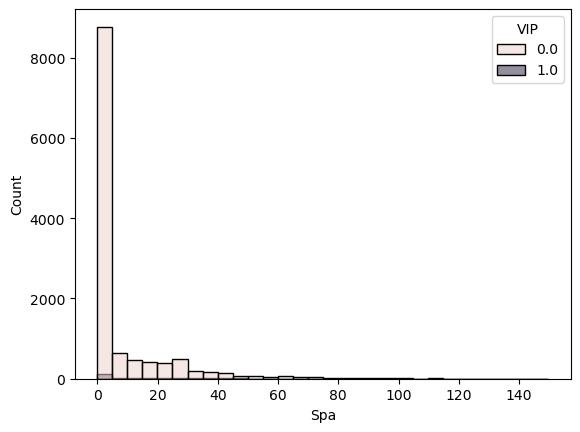

In [116]:
sns.histplot(data=df,x=np.sqrt(df['Spa']),bins=30,hue=df['VIP'],color='dark')

<AxesSubplot:xlabel='VIP', ylabel='count'>

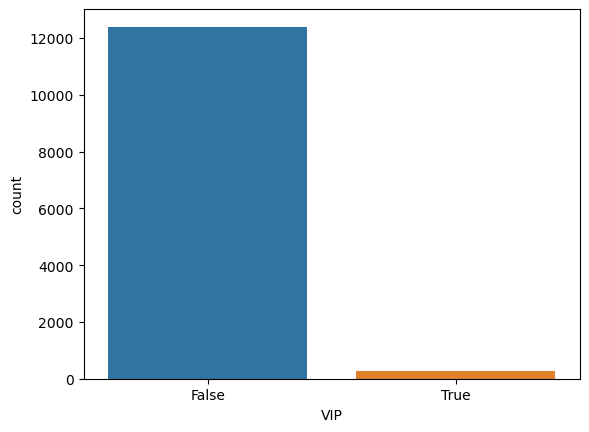

In [117]:
sns.countplot(data=train,x=df['VIP'],)

In [118]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [119]:
train.pivot_table(index='HomePlanet',columns='VIP',values='CryoSleep',aggfunc='count')

VIP,False,True
HomePlanet,,
Earth,4379.0,NaN
Europa,1903.0,128.0
Mars,1611.0,63.0


In [120]:
df['RoomService'].unique

<bound method Series.unique of 0          0.0
1        109.0
2         43.0
3          0.0
4        303.0
         ...  
12965      0.0
12966      0.0
12967      0.0
12968      0.0
12969      0.0
Name: RoomService, Length: 12970, dtype: float64>

# Exploring Cabin

In [121]:
df['Cabin']

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966         NaN
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [122]:
cabininitial=train['Cabin'].str.split('/')

In [123]:
cabininitial.head(20)

0     [B, 0, P]
1     [F, 0, S]
2     [A, 0, S]
3     [A, 0, S]
4     [F, 1, S]
5     [F, 0, P]
6     [F, 2, S]
7     [G, 0, S]
8     [F, 3, S]
9     [B, 1, P]
10    [B, 1, P]
11    [B, 1, P]
12    [F, 1, P]
13    [G, 1, S]
14    [F, 2, P]
15          NaN
16    [F, 3, P]
17    [F, 4, P]
18    [F, 5, P]
19    [G, 0, P]
Name: Cabin, dtype: object

- How does this try except work look again appending.., Its correct each value of list goes to individual lists (since we have null values we are using try except

In [124]:
deck=[]
decknum=[]
side=[]
for i in cabininitial:
    try:
        deck.append(i[0])
        decknum.append(i[1])
        side.append(i[2])
    except:                         # when 14. [F, 2, P] 15 NaN
        deck.append('NULL')
        decknum.append('-1') # else -1 as indicator of nan value
        side.append('NULL')

In [125]:
print(set(deck))
print('maximum decknum is:{}'.format(max(decknum)),'minimum :{}'.format(0),sep='\n')
print(set(side))

{'D', 'F', 'T', 'A', 'NULL', 'C', 'G', 'B', 'E'}
maximum decknum is:999
minimum :0
{'P', 'NULL', 'S'}


- P=Port=Left
- S=Starboard=Right

- Find mean median mode and impute the nan 
- (as currently they are list not series so can't do value_counts )
- can do mode for deck but cant do median/mean for deck no as it varies

In [126]:
import statistics
print(statistics.mode(deck))
print(statistics.mode(side))

F
S


In [127]:
Cabin2=pd.DataFrame({"deck":deck,"decknum":decknum,"side":side})

In [128]:
#sns.histplot(x=Cabin2["decknum"],kde=True,bins=200)

- decknum is maybe useless...

F       2794
G       2559
E        876
B        779
C        747
D        478
A        256
NULL     199
T          5
Name: deck, dtype: int64

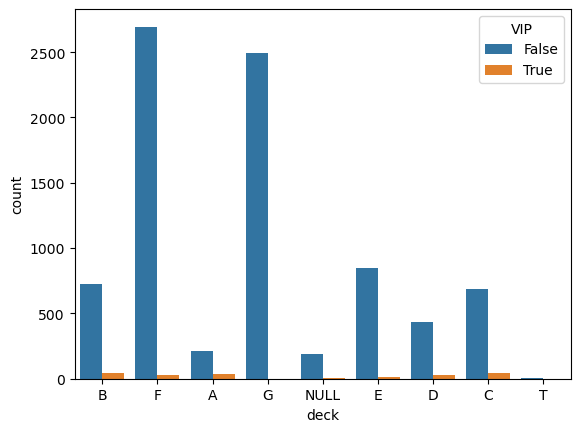

In [129]:
sns.countplot(x=Cabin2["deck"],hue=df['VIP'])
Cabin2['deck'].value_counts()


VIPs are distributed in every Cabin ie- no special cabins for VIPs but in the same Cabins probably some deluxe rooms, T can be merged with F or G

In [130]:
Cabin2['deck'].value_counts()

F       2794
G       2559
E        876
B        779
C        747
D        478
A        256
NULL     199
T          5
Name: deck, dtype: int64

In [131]:
Cabin2.loc('deck'=='T')

In [132]:
def impute_deck(cols):
    deck=cols
    if deck=='NULL':
        return 'F'
    else:
        return deck

In [133]:
Cabin2['deck']=Cabin2['deck'].apply(impute_deck)  

In [134]:
def impute_side(cols):
    side=cols
    if side=='NULL':
        return 'S'
    else:
        return side

In [135]:
Cabin2['side']=Cabin2['side'].apply(impute_side)  

In [136]:
Cabin2.head(16)

,deck,decknum,side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
5,F,0,P
6,F,2,S
7,G,0,S
8,F,3,S
9,B,1,P


In [137]:
Cabin2=Cabin2.drop(columns=['decknum'],axis=1)

In [138]:
Cabin2.head(10)

,deck,side
0,B,P
1,F,S
2,A,S
3,A,S
4,F,S
5,F,P
6,F,S
7,G,S
8,F,S
9,B,P


###################################################################################################

## Taking passenger group number-

In [139]:
Groupnum=df['PassengerId'].str.split('_')

In [140]:
Groupnum
Groupid=[]
for i in Groupnum:
    Groupid.append(i[0])

Groupid=pd.DataFrame({"Groupid":Groupid})

In [141]:
Groupid=Groupid.astype('int')

In [142]:
Groupid.head(10)

,Groupid
0,1
1,2
2,3
3,3
4,4
5,5
6,6
7,6
8,7
9,8


########################################################################################################

In [143]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [144]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [145]:
df['FoodCourt'].max()   # 0 t0 30k

29813.0

<AxesSubplot:>

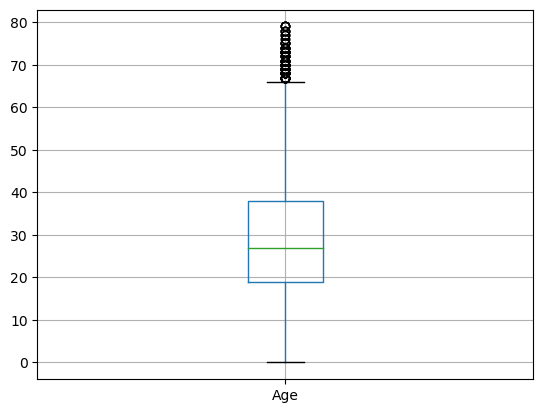

In [146]:
df.boxplot('Age')

<AxesSubplot:>

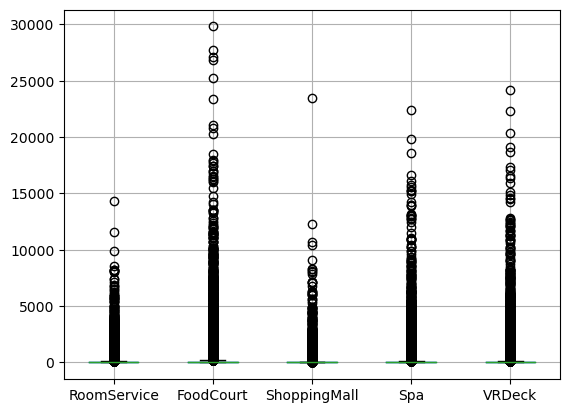

In [147]:
df.boxplot(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

## Imputing Missing Values

### Impute AGE

In [148]:
def age(cols):            # cols has Age value if df[['Age'],['']]                          #
    Age=cols
    if pd.isnull(Age):
        return 24
    else:
        return Age

In [149]:
df['Age']=df['Age'].apply(age)

## Let's Try Binning the age

In [150]:
def age(cols):            # cols has Age value if df[['Age'],['']]                          #
    Age=cols
    if Age<=10:
        return 'Infant'
    elif Age>10 and Age<=20:
        return 'Teen'
    elif Age>20 and Age<=50:
        return 'Adult'
    else:
        return 'elder'

In [151]:
df['Age']=df['Age'].apply(age)

# Impute HomePlanet

In [152]:
def Homeplanetimpute(cols):
    HomePlanet=cols[0]
    VIP=cols[1]
    if pd.isnull(HomePlanet):
        if VIP == 'True':
            return 'Europa'
        elif VIP =='False':
            return 'Earth'
        else:
            return 'Earth'
    else:
        return HomePlanet

In [153]:
df['HomePlanet']=df[['HomePlanet','VIP']].apply(Homeplanetimpute,axis=1)

## Imputing RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

In [154]:
df['RoomService'].median()

0.0

In [155]:
df['RoomService'].fillna(value=df['RoomService'].median(),inplace=True)
df['FoodCourt'].fillna(value=df['FoodCourt'].median(),inplace=True)
df['ShoppingMall'].fillna(value=df['ShoppingMall'].median(),inplace=True)
df['Spa'].fillna(value=df['Spa'].median(),inplace=True)
df['VRDeck'].fillna(value=df['VRDeck'].median(),inplace=True)

In [156]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Cabin            299
Destination      274
Age                0
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

### Fill missing Destination and CryoSleep

In [157]:
print(df['Destination'].mode()[0])
df['Destination'].fillna(value=df['Destination'].mode()[0],inplace=True)

TRAPPIST-1e


In [158]:
print(df['CryoSleep'].mode()[0])
df['CryoSleep'].fillna(value=df['CryoSleep'].median(),inplace=True)

False


In [159]:
print(df['VIP'].mode()[0])
df['VIP'].fillna(value=df['VIP'].mode()[0],inplace=True)

False


In [160]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

### Transforming The data (log transform used due to skewness)

Checking the Skewness

In [161]:
df.skew()     # VIP is categorical

PassengerId      0.001741
CryoSleep        0.614344
VIP              6.673901
RoomService      6.201370
FoodCourt        7.131239
ShoppingMall    11.127335
Spa              7.737102
VRDeck           8.143226
Transported     -0.014497
dtype: float64

In [162]:
df['RoomService']=df['RoomService'].apply(lambda x: np.log(x+1))
df['FoodCourt']=df['FoodCourt'].apply(lambda x: np.log(x+1))
df['ShoppingMall']=df['ShoppingMall'].apply(lambda x: np.log(x+1))
df['Spa']=df['Spa'].apply(lambda x: np.log(x+1))
df['VRDeck']=df['VRDeck'].apply(lambda x: np.log(x+1))

In [163]:
df.skew()

PassengerId     0.001741
CryoSleep       0.614344
VIP             6.673901
RoomService     1.141578
FoodCourt       1.143142
ShoppingMall    1.230001
Spa             1.127518
VRDeck          1.214361
Transported    -0.014497
dtype: float64

- Skewness removed pretty much
- VIP is Categorical data so its skewness doesnt matter

array([[<AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>],
       [<AxesSubplot:title={'center':'VRDeck'}>, <AxesSubplot:>]],
      dtype=object)

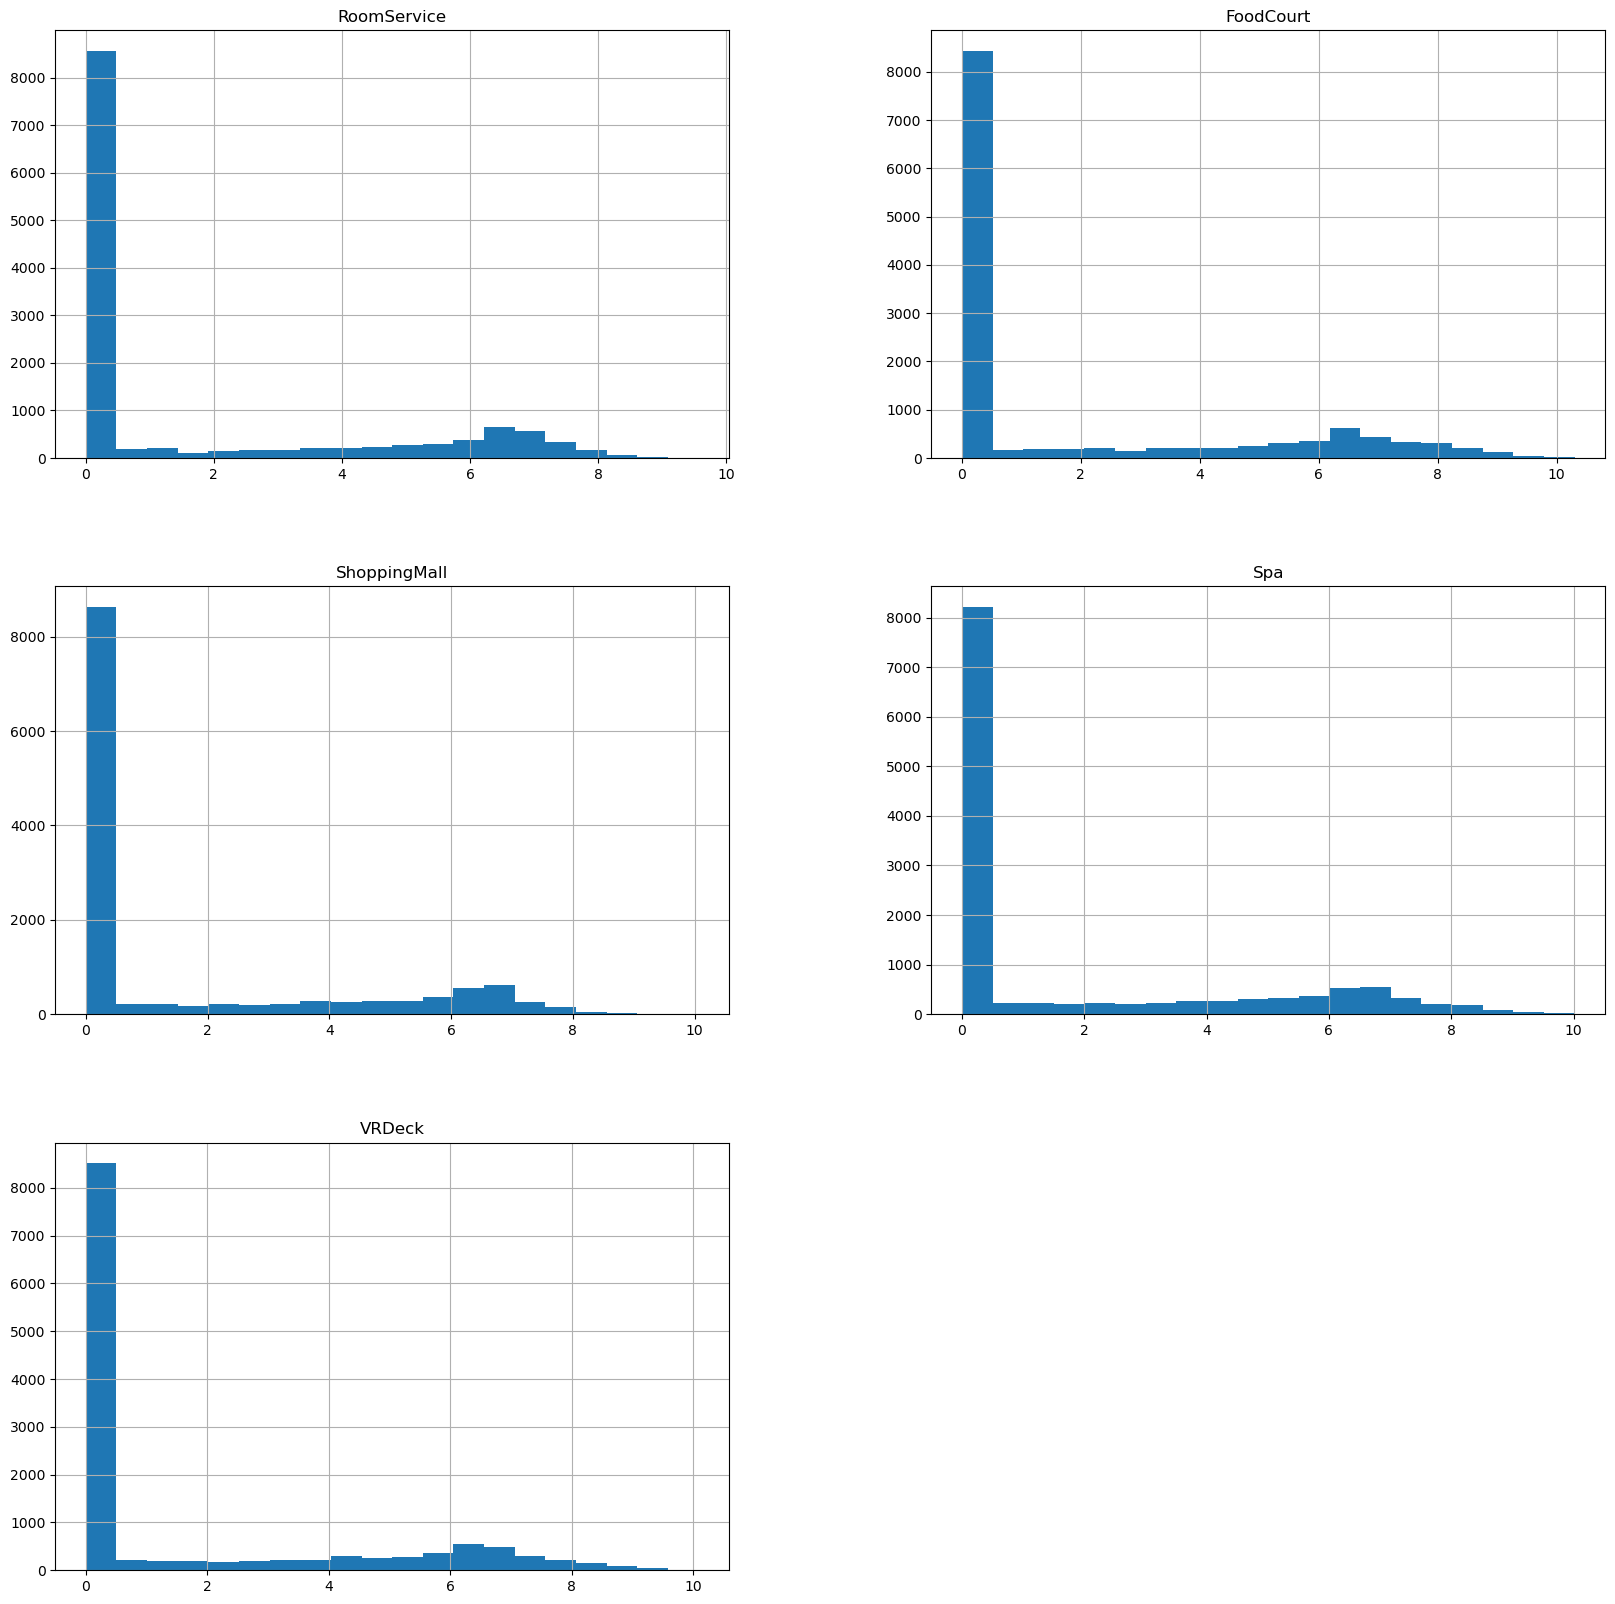

In [164]:
df.hist(bins=20,figsize=(20,20))

## Feature Selection

#### Dropping Name,Cabin,PassengerId

In [165]:
df.drop(['Name','Cabin','PassengerId'],inplace=True,axis=1)

In [166]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

### Concatenating Cabin2 (Groupid didnt work well performance detoriated so not adding groupid)

In [167]:
df=pd.concat([df,Cabin2],axis=1)

In [168]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,Adult,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,B,P
1,Earth,False,TRAPPIST-1e,Adult,False,4.700480,2.302585,3.258097,6.309918,3.806662,True,F,S
2,Europa,False,TRAPPIST-1e,elder,True,3.784190,8.182280,0.000000,8.812248,3.912023,False,A,S
3,Europa,False,TRAPPIST-1e,Adult,False,0.000000,7.157735,5.918894,8.110728,5.267858,False,A,S
4,Earth,False,TRAPPIST-1e,Teen,False,5.717028,4.262680,5.023881,6.338594,1.098612,True,F,S


### Using LabelEncoder to convert categorical values to numbers
- HomePLanet
- Destination
- VIP
- Transported
- deck
- side
- Age (as we binned it)

In [169]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols=['HomePlanet','Destination','VIP','CryoSleep','Transported','deck','side','Age']

for col in cols:
    df[col]=le.fit_transform(df[col])
    
# df['HomePlanet']= le.fit_transform(data['HomePlanet'])   

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,1,0,2,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
1,0,0,2,0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,5,1
2,1,0,2,3,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,1
3,1,0,2,0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,1
4,0,0,2,2,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,5,1


### Standardizing (Didnt work properly so didnt do standardization)
- (Checking by both doing it and not Doing it choosing whichever gives better reults)
- All our datas are in different units so Using StandardScaler to bring all the data into same scale
(can be usefull sometimes)

In [170]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=df.columns
df=pd.DataFrame(scaler.fit_transform(df),columns=cols)'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\ncols=df.columns\ndf=pd.DataFrame(scaler.fit_transform(df),columns=cols)'

In [171]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,1,0,2,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
1,0,0,2,0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,5,1
2,1,0,2,3,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,1
3,1,0,2,0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,1
4,0,0,2,2,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0,1,2,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,8,2
12966,0,0,2,0,0,0.000000,6.742881,2.890372,2.397895,4.976734,2,8,2
12967,2,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,8,2
12968,1,0,2,0,0,0.000000,7.893945,0.000000,0.000000,6.261492,2,8,2


# BLINK (just to stop execution mid way ie no purpose of blink)

In [172]:
#blink

### Seperating Train and Test

In [173]:
train=df.iloc[:train_len,:]   # =>rows till 0 to train_len-1 , all columns
test=df.iloc[train_len:,:]

In [174]:
############################################ STOP ########################

### Seperating X and y   ( Y= Transported)

In [175]:
# input split (What is this step)   note wer using 'train' only
X=train.drop(columns=['Transported'],axis=1)
Y=train['Transported']

In [177]:
#X.info()

In [178]:

from sklearn.model_selection import train_test_split, cross_val_score
#classify column 

def classify(model):
    x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, random_state=42 )
    model.fit(x_train,y_train)
    print('Accuracy:',model.score(x_test, y_test))   
    
    score=cross_val_score(model,X,Y,cv=5)      # will give 5 scores cv=5 => 5 folds
    print('CV_score:',np.mean(score))

In [179]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Accuracy: 0.765409383624655
CV_score: 0.7721160329832563


In [180]:
from sklearn.svm import SVC
model=SVC()
classify(model)

Accuracy: 0.7842686292548298
CV_score: 0.7885675602885407


In [181]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model)

Accuracy: 0.7387304507819688
CV_score: 0.7511815515047403


In [182]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model)

Accuracy: 0.7861085556577737
CV_score: 0.7928240705509759


In [183]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
classify(model)

Accuracy: 0.7723091076356946
CV_score: 0.782241424148238


In [184]:
from xgboost import XGBClassifier
model= XGBClassifier()
classify(model)

Accuracy: 0.7884084636614536
CV_score: 0.7907535844244704


In [185]:
from lightgbm import LGBMClassifier
model= LGBMClassifier()
classify(model)

Accuracy: 0.7925482980680773
CV_score: 0.7986904368805796


In [186]:
from catboost import CatBoostClassifier
model= CatBoostClassifier(verbose=0)    #verbose=0 else it will go deeplearning
classify(model)

Accuracy: 0.7874885004599816
CV_score: 0.8004168235517548


## Complete Model Training with Full data

In [187]:
model=CatBoostClassifier(verbose=0)
model.fit(X,Y)

In [188]:
# input split for test data we dont need y as thats what we need to predict
X_test=test.drop(columns=['Transported'],axis=1)


In [189]:
pred=model.predict(X_test)
pred                               # our predicted Y_test (Transported) using the 'X'_test

array([1, 0, 1, ..., 1, 0, 1])

need to convert the values to Boolean type acc to submission.csv pattern ( if changed to categ)

In [190]:
transported=[]
for i in pred:
    if i == 1:
        transported.append(True)
    if i == 0:
        transported.append(False)
transported[0:10]   

[True, False, True, False, False, False, True, True, True, True]

In [191]:
sub=pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


- this means we need pandas dataframe type object and PassengerId too

In [192]:
transported=list(transported)

In [193]:
PassengerId=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv',usecols=['PassengerId'])
print(PassengerId[0:10])

  PassengerId
0     0013_01
1     0018_01
2     0019_01
3     0021_01
4     0023_01
5     0027_01
6     0029_01
7     0032_01
8     0032_02
9     0033_01


In [194]:
print(type(PassengerId))
PassengerId=PassengerId['PassengerId'].tolist()

<class 'pandas.core.frame.DataFrame'>


In [195]:
PassengerId[0:5]

['0013_01', '0018_01', '0019_01', '0021_01', '0023_01']

In [196]:
transported2=pd.DataFrame({'PassengerId':PassengerId,'transported':transported})

In [197]:
#pip show pandas

In [198]:
transported2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [199]:
#transported['transpored']=transported['transported'].astype('bool')

In [200]:
transported2

,PassengerId,transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


Generate csv file

In [201]:
transported2.to_csv('submission.csv',index=False)

In [202]:
#Now click submit